# **Abstract**

The Census Income dataset contains demographic information from the 1994 Census database. It features data on 48,842 individuals, including age, education, marital status, occupation, and income, with the goal of predicting whether an individual's income exceeds $50K/year.

# **Details About the Dataset**
 ***Census Income***

 Kohavi,Ron. (1996). Census Income. UCI Machine Learning Repository. https://doi.org/10.24432/C5GP7S.

Predict whether income exceeds $50K/yr based on census data.



This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

---

Instances - 48842

Features - 14


age: continuous.

1.   
age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
4. education-num: continuous.
5. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
6. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
7. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
8. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
9. sex: Female, Male.
10. capital-gain: continuous.
11. capital-loss: continuous.
12. hours-per-week: continuous.
13. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



**Importing required Libraries and H20 Initialization**

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [2]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, r2_score, mean_squared_error
from sklearn import metrics



In [4]:
min_mem_size = 6
run_time = 222
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

6


In [5]:
port_no = random.randint(5555, 55555)
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )
except:
    logging.critical("h2o.init")
    h2o.download_all_logs()
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:45750..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpa2zh54bn
  JVM stdout: /tmp/tmpa2zh54bn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpa2zh54bn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:45750
Connecting to H2O server at http://127.0.0.1:45750 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_gsxnhv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


#Importing Data an EDA

In [6]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

# Converting the noisy data in the dependent variable



In [7]:
y_mod= y['income']
for i in range(len(y_mod)):
  if y_mod[i]=="<=50K.":
    y_mod[i]="<=50K"
  if y_mod[i]==">50K.":
    y_mod[i]=">50K"

<ipython-input-7-f254aeabb6de>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_mod[i]="<=50K"
<ipython-input-7-f254aeabb6de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_mod[i]=">50K"


In [8]:
# This converts the array into dataframe
Y=y_mod.to_frame(name='income')


**Now Let's handle numerical features in dependent variables**

#Finding and handling the Missing data


Convert empty data to standard null values

In [9]:
X.replace({'?':np.nan},inplace=True)

<ipython-input-9-37eaac7aa2c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace({'?':np.nan},inplace=True)


In [10]:
#Finding Total missing values
X.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
dtype: int64

Using Mode value method to fill-in the missing values ( which uses highest occurrence value )




In [11]:
X['workclass'].fillna(X['workclass'].mode().values[0],inplace=True)
X['occupation'].fillna(X['occupation'].mode().values[0],inplace=True)
X['native-country'].fillna(X['native-country'].mode().values[0],inplace=True)

<ipython-input-11-112f24929e45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'].fillna(X['workclass'].mode().values[0],inplace=True)
<ipython-input-11-112f24929e45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['occupation'].fillna(X['occupation'].mode().values[0],inplace=True)
<ipython-input-11-112f24929e45>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'].fillna(X['native-country'].mode().valu

In [12]:
X.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

# Checking the distribution of independent variables (Numerical Features)


<Figure size 800x500 with 0 Axes>

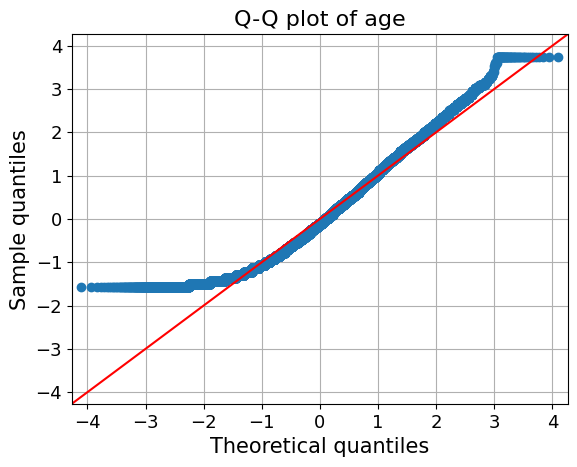

<Figure size 800x500 with 0 Axes>

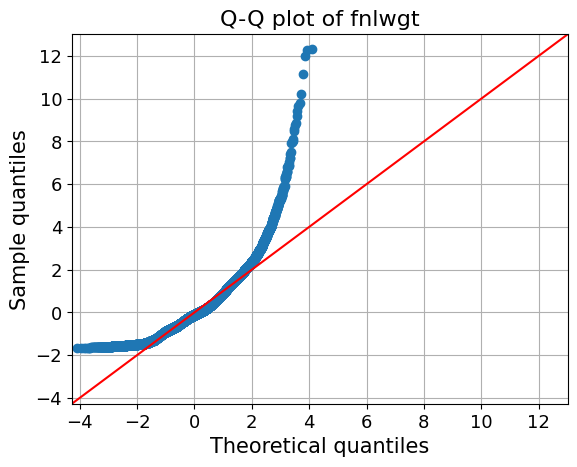

<Figure size 800x500 with 0 Axes>

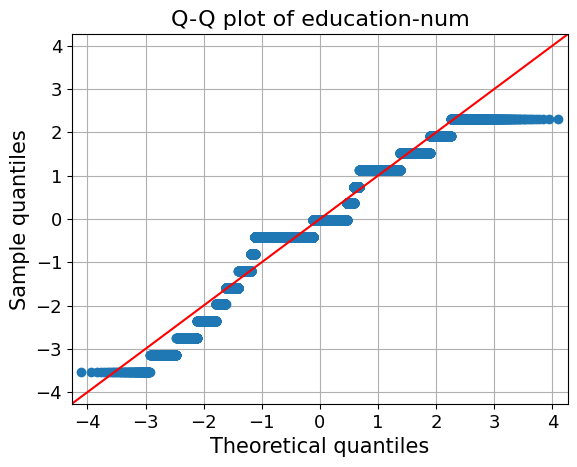

<Figure size 800x500 with 0 Axes>

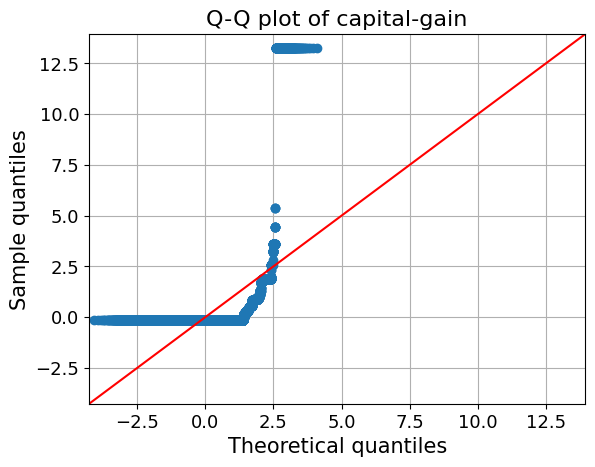

<Figure size 800x500 with 0 Axes>

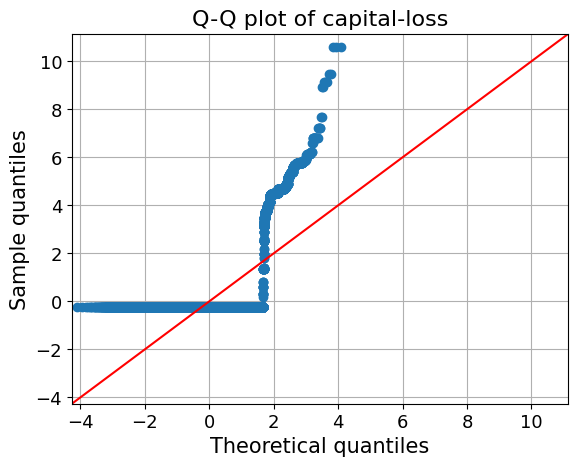

<Figure size 800x500 with 0 Axes>

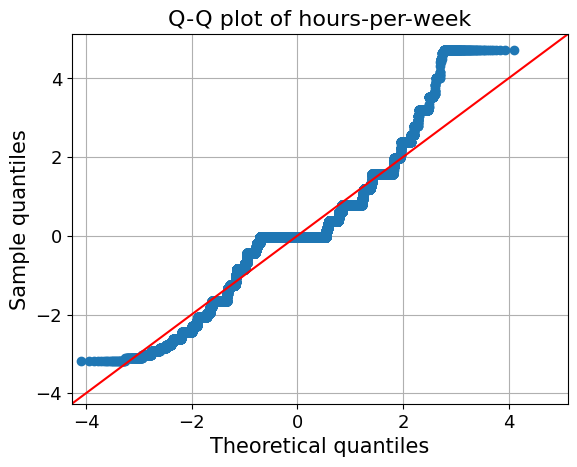

In [13]:
# checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = X[
    ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

1.   **Age** - It might resemble a normal distribution, the heavier tails suggest that the overall distribution of age in this dataset is not perfectly normal.
2.   **Fnlwgt** - The distribution is heavily right-skewed which means that the bulk of the data is concentrated on the left with a long tail stretching to the right. It seems like a Logarithamic distibution.
3.   **Education-num** - It is not a normal distribution but the variable is not continuous but categorical with an order.
4.   **Capital-gain** - This distribution is highly right-skewed with many outliers at the higher end.
5.   **Capital-loss** - It is similar to Capital gain but has high outliers
6.   **Hours-per-week** - The distribution bit similar like normal but not perfectly normal.



Let's check their distribution

Ploting a graph to visualize the distribution of the elements

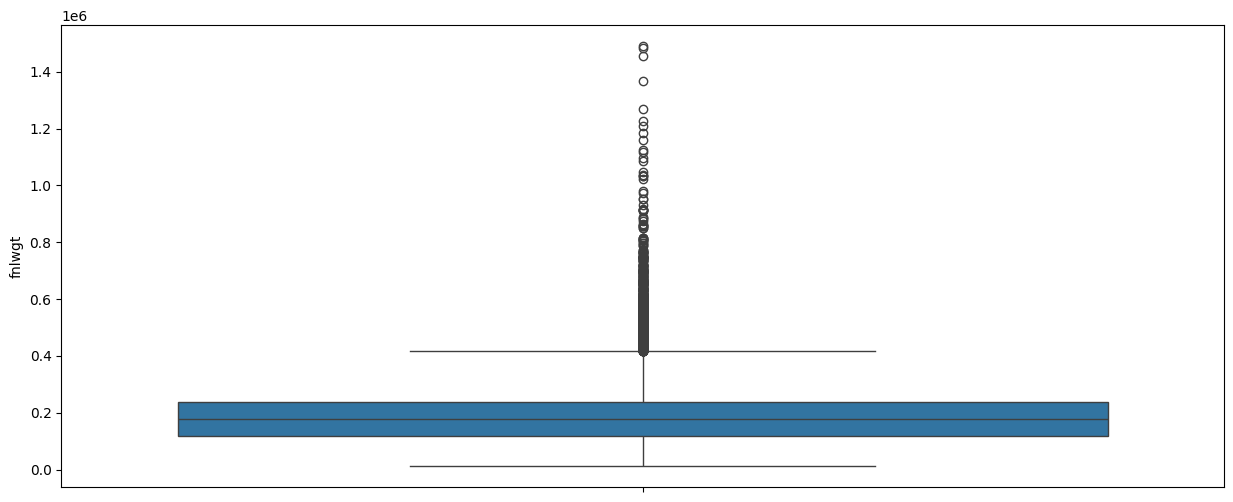

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(X['fnlwgt'])
plt.show()

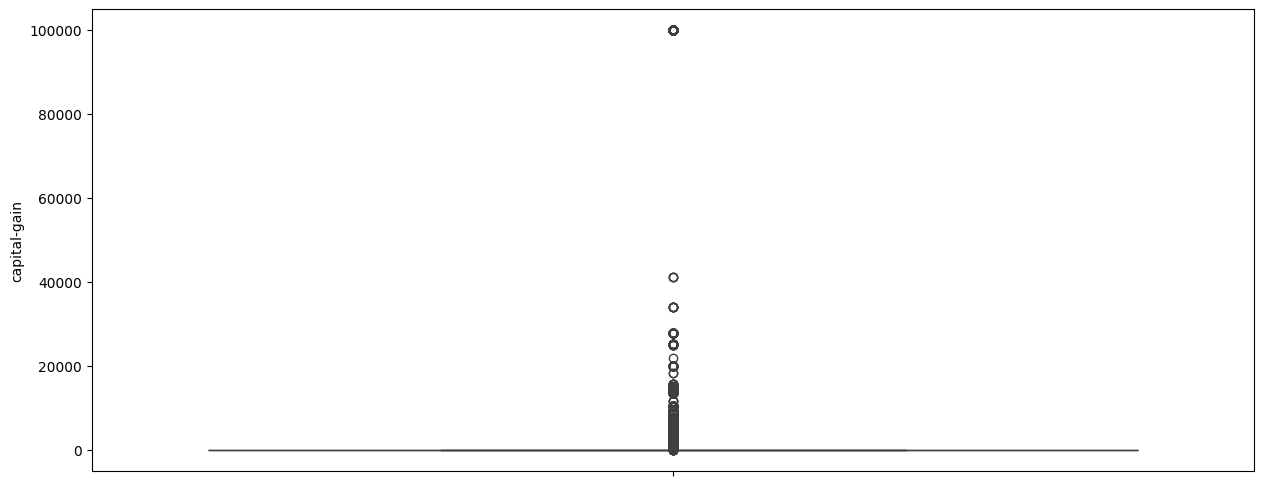

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(X['capital-gain'])
plt.show()

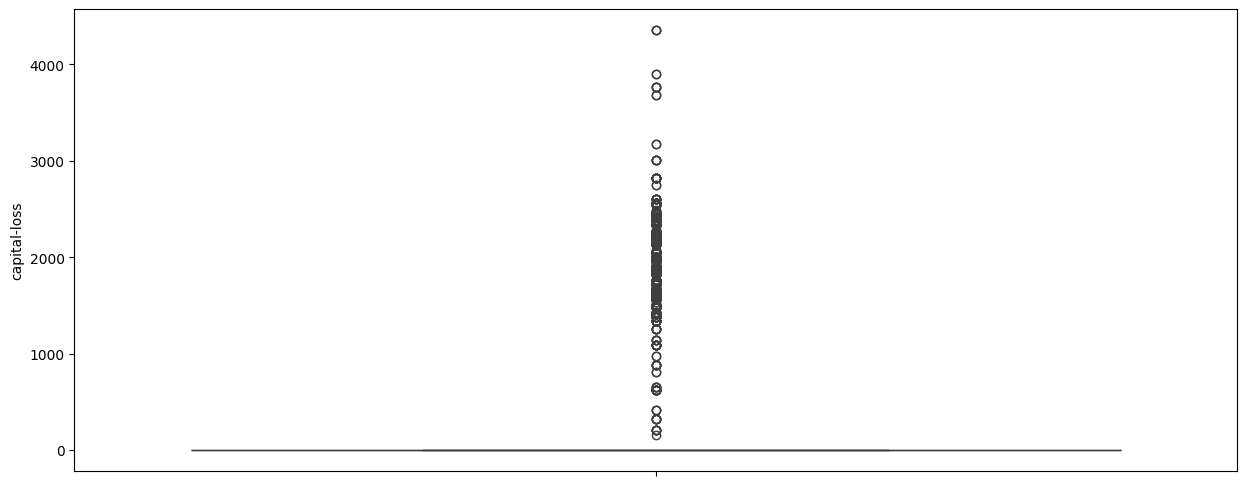

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(X['capital-loss'])
plt.show()

# Correlation


In [17]:
X.corr()

<ipython-input-17-6b9de402e4ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X.corr()


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


<ipython-input-18-a2ca540c5f40>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X.corr(),annot=True)


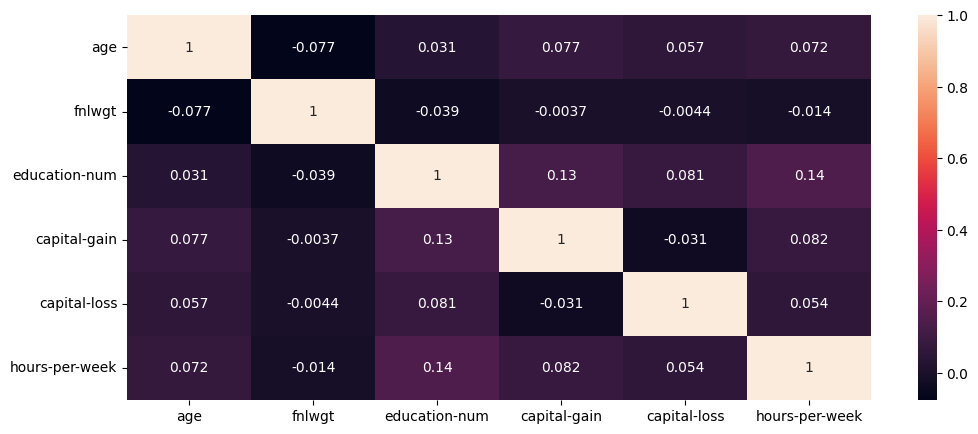

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(),annot=True)
plt.show()

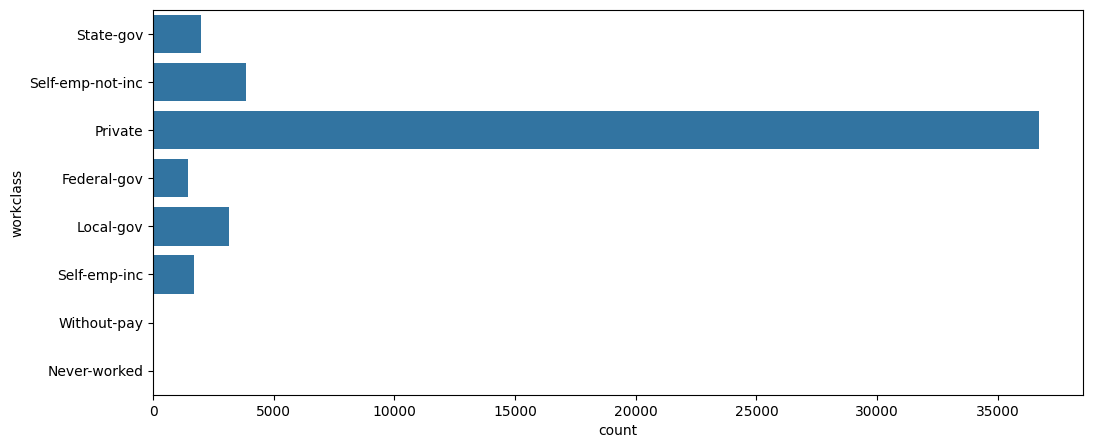

In [19]:
plt.figure(figsize=(12,5))

sns.countplot(X['workclass'])
plt.show()

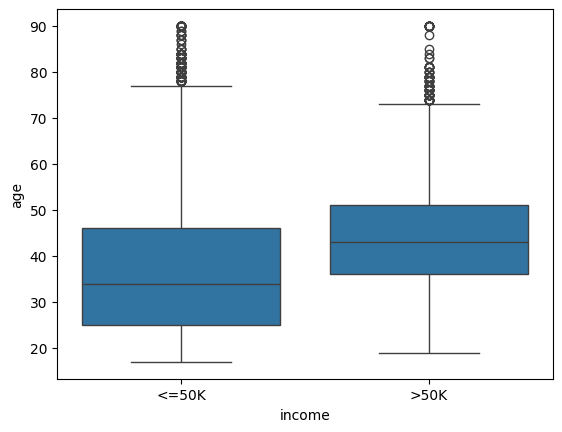

In [20]:
sns.boxplot(x=y['income'],y='age',data=X)
plt.show()

avg people's age is 44 approx. for income > 50k which is more compared to income <= 50k

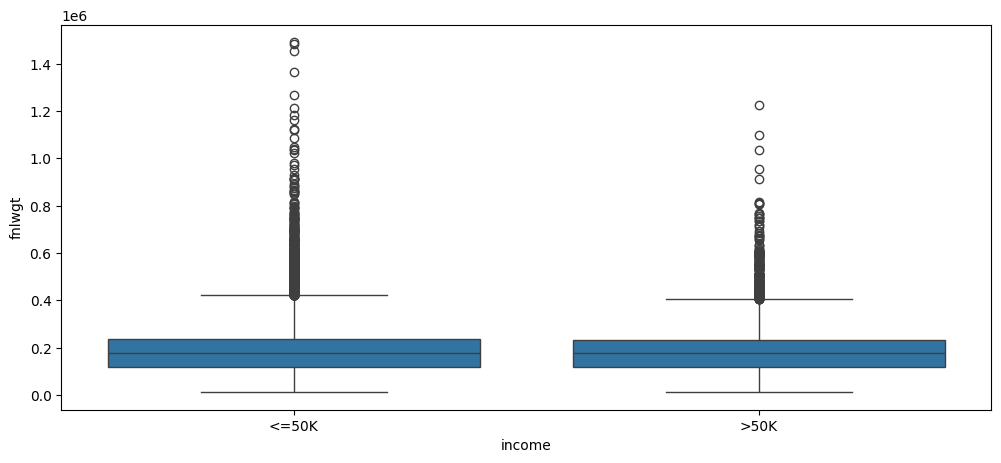

In [21]:
plt.figure(figsize=(12,5))
sns.boxplot(x=y['income'],y='fnlwgt',data=X)
plt.show()

weight has no significance on income

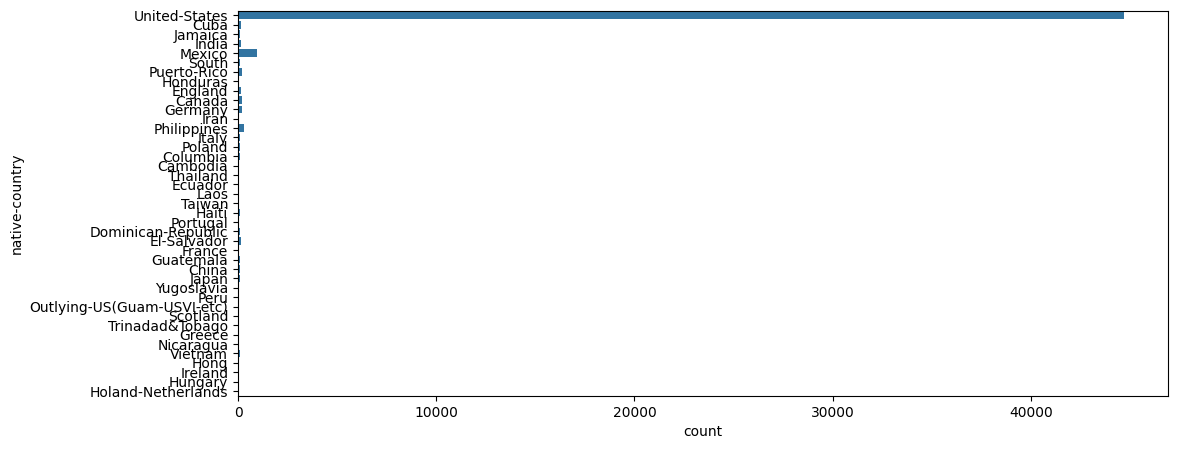

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(X['native-country'])
# plt.xticks(rotation = 90)
plt.show()

Creating Copy of the dataset

In [23]:
df=X.copy(deep=True)

# Label Encoding the categorical variable in the dataframe



In [24]:
columns_to_encode = [ 'workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for col in columns_to_encode:
    df[col] = df[col].astype(str)


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])


In [26]:
column_to_encode = ['income']
for column in column_to_encode:
    Y[column] = encoder.fit_transform(Y[column])
Y.tail(10)

,income
48832,0
48833,0
48834,0
48835,0
48836,0
48837,0
48838,0
48839,0
48840,0
48841,1


In [27]:
data=pd.concat([df,Y],axis=1)
inde=df.columns

In [28]:
data=data.dropna()

# Removing Outliers

In [29]:
#Removing data above 40000
data = data[data['capital-gain'] <= 40000]

In [30]:
data = data[data['capital-loss'] <= 1000]

In [31]:
data.reset_index(drop=True)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46353,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
46354,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
46355,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
46356,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46358 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             46358 non-null  int64
 1   workclass       46358 non-null  int64
 2   fnlwgt          46358 non-null  int64
 3   education       46358 non-null  int64
 4   education-num   46358 non-null  int64
 5   marital-status  46358 non-null  int64
 6   occupation      46358 non-null  int64
 7   relationship    46358 non-null  int64
 8   race            46358 non-null  int64
 9   sex             46358 non-null  int64
 10  capital-gain    46358 non-null  int64
 11  capital-loss    46358 non-null  int64
 12  hours-per-week  46358 non-null  int64
 13  native-country  46358 non-null  int64
 14  income          46358 non-null  int64
dtypes: int64(15)
memory usage: 5.7 MB


In [33]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

# **Identifing predictor significance using Logit**

In [34]:
import statsmodels.api as sm
model = sm.Logit(
    data['income'],
    data[ [*inde] ],
).fit()
# Printing out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.404664
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                46358
Model:                          Logit   Df Residuals:                    46344
Method:                           MLE   Df Model:                           13
Date:                Tue, 20 Feb 2024   Pseudo R-squ.:                  0.2360
Time:                        04:25:07   Log-Likelihood:                -18759.
converged:                       True   LL-Null:                       -24555.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0095      0.001      9.540      0.000       0.008       0.011
workclass         -0.2152      0.011    -19.768      0.000      -0.237      -0.194
fnlwgt         -1.006e-06   1.24e-07     -8.107      0.000   -1.25e-06   -7.63e-07
education         -0.0310      0.004     -8.149      0.000      -0.039      -0.024
education-num      0.2304      0.005     43.247      0.000       0.220       0.241
marital-status    -0.3580      0.010    -36.459      0.000      -0.377      -0.339
occupation        -0.0203      0.003     -6.241      0.000      -0.027      -0.014
relationship      -0.3605      0.012    -31.132      0.000      -0.383      -0.338
race              -0.1583      0.015    -10.912      0.000      -0.187      -0.130
sex                0.3388      0.038      8.892      0.000       0.264       0.414
capital-gain       0.0003   7.93e-06     41.897      0.000       0.000       0.000
capital-loss      -0.0019      0.001     -1.569      0.117      -0.004       0.000
hours-per-week     0.0111      0.001     10.351      0.000       0.009       0.013
native-country    -0.0492      0.002    -27.750      0.000      -0.053      -0.046
==================================================================================
"""

# VIF


In [35]:
col

'native-country'

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dependent = 'income'
col = data.columns.drop(dependent)
# vif = pd.Series([variance_inflation_factor(data[col], X) for X in col], index=col)
# print(vif.to_string())
x= data[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
vif_data = pd.DataFrame()
vif_data["feature"] = col

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [37]:
print(vif_data)

           feature        VIF
0              age   8.699403
1        workclass   8.451322
2           fnlwgt   4.022119
3        education   9.108996
4    education-num  18.802400
5   marital-status   4.089055
6       occupation   3.381719
7     relationship   2.690914
8             race  17.758343
9              sex   4.349014
10    capital-gain   1.097341
11    capital-loss   1.003055
12  hours-per-week  11.775735
13  native-country  28.915128



Greater than 5 or 10 (depending on your field and data) are generally considered to have high multicollinearity



1.   native-country  28.915128
2.   race  17.758343
3.   education-num  18.802400




In [38]:

country_to_continent = {
    'United-States': 'North America', 'Mexico': 'North America', 'Philippines': 'Asia',
    'Germany': 'Europe', 'Puerto-Rico': 'North America', 'Canada': 'North America',
    'El-Salvador': 'South America', 'India': 'Asia', 'Cuba': 'North America',
    'England': 'Europe', 'China': 'Asia', 'South': 'Asia', 'Jamaica': 'North America',
    'Italy': 'Europe', 'Dominican-Republic': 'North America', 'Japan': 'Asia',
    'Guatemala': 'South America', 'Poland': 'Europe', 'Vietnam': 'Asia',
    'Columbia': 'South America', 'Haiti': 'North America', 'Portugal': 'Europe',
    'Taiwan': 'Asia', 'Iran': 'Asia', 'Greece': 'Europe', 'Nicaragua': 'South America',
    'Peru': 'South America', 'Ecuador': 'South America', 'France': 'Europe',
    'Ireland': 'Europe', 'Hong': 'Asia', 'Thailand': 'Asia', 'Cambodia': 'Asia',
    'Trinadad&Tobago': 'North America', 'Laos': 'Asia', 'Yugoslavia': 'Europe',
    'Outlying-US(Guam-USVI-etc)': 'North America', 'Scotland': 'Europe', 'Honduras': 'South America',
    'Hungary': 'Europe', 'Holand-Netherlands': 'Europe'
}

X['native-country'] = [country_to_continent[country] for country in X['native-country']]




<ipython-input-38-d7cfea9c9929>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['native-country'] = [country_to_continent[country] for country in X['native-country']]


In [39]:
X['native-country'].value_counts()

North America    46478
Asia              1096
Europe             780
South America      488
Name: native-country, dtype: int64

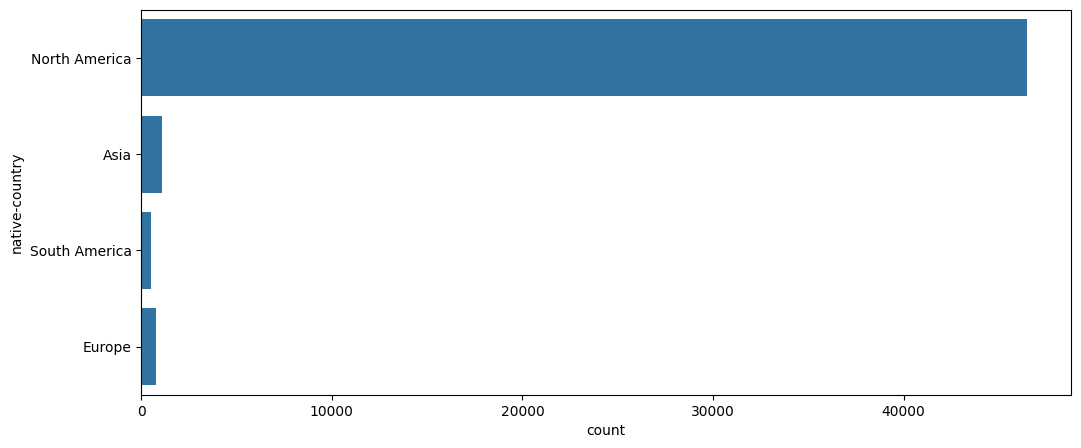

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.countplot(X['native-country'])
# plt.xticks(rotation = 90)
plt.show()

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dependent = 'income'
col = data.columns.drop(dependent)
# vif = pd.Series([variance_inflation_factor(data[col], X) for X in col], index=col)
# print(vif.to_string())
x= data[['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']]
vif_data = pd.DataFrame()
vif_data["feature"] = col

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [42]:
print(vif_data)

           feature        VIF
0              age   8.699403
1        workclass   8.451322
2           fnlwgt   4.022119
3        education   9.108996
4    education-num  18.802400
5   marital-status   4.089055
6       occupation   3.381719
7     relationship   2.690914
8             race  17.758343
9              sex   4.349014
10    capital-gain   1.097341
11    capital-loss   1.003055
12  hours-per-week  11.775735
13  native-country  28.915128


In [43]:
data.drop('native-country',axis=1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,0
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,0
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,0
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,0


In [44]:
da = data.drop('income', axis=1)
inde = da.columns

In [45]:
from sklearn.model_selection import train_test_split
y,c= data['income'],data[
       [*inde]
    ]

X_t, X_test, y_t, y_test = train_test_split(c, y, test_size=0.1, random_state=1)

# Regularization

In [46]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_t, y_t)
y_pred = ridge.predict(X_test)

from sklearn.metrics import roc_auc_score

#Calculating AUC
auc = roc_auc_score(y_test, y_pred)
print(f'AUC: {auc}')

AUC: 0.8419804192249043


In [47]:
da.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
age,1.000000,0.041082,-0.077524,-0.018554,0.020929,-0.264031,0.000073,-0.261582,0.026208,0.083259,0.119676,0.008257,0.068096,-0.003017
workclass,0.041082,1.000000,-0.027493,0.003782,0.003652,-0.018104,0.008856,-0.055355,0.052774,0.066052,0.014521,-0.003180,0.039837,-0.005167
fnlwgt,-0.077524,-0.027493,1.000000,-0.022323,-0.041169,0.030399,-0.004896,0.009951,-0.026944,0.027152,-0.004072,-0.004109,-0.013953,-0.058909
education,-0.018554,0.003782,-0.022323,1.000000,0.364712,-0.036385,-0.036727,-0.009169,0.013289,-0.029778,0.027571,-0.004975,0.056221,0.078094
education-num,0.020929,0.003652,-0.041169,0.364712,1.000000,-0.064805,0.068583,-0.084113,0.026992,0.002332,0.155021,-0.001988,0.134361,0.093334
marital-status,-0.264031,-0.018104,0.030399,-0.036385,-0.064805,1.000000,0.031454,0.187044,-0.069728,-0.124594,-0.063778,-0.017545,-0.183565,-0.017405
occupation,0.000073,0.008856,-0.004896,-0.036727,0.068583,0.031454,1.000000,-0.033463,-0.004496,0.042788,0.013260,-0.001303,-0.018883,-0.000021
relationship,-0.261582,-0.055355,0.009951,-0.009169,-0.084113,0.187044,-0.033463,1.000000,-0.117583,-0.574596,-0.076072,0.035636,-0.244905,-0.006843
race,0.026208,0.052774,-0.026944,0.013289,0.026992,-0.069728,-0.004496,-0.117583,1.000000,0.086546,0.024172,-0.000532,0.038544,0.111053
sex,0.083259,0.066052,0.027152,-0.029778,0.002332,-0.124594,0.042788,-0.574596,0.086546,1.000000,0.065617,-0.022215,0.223753,-0.003029


# H2o

In [48]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [49]:
data.head()

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [50]:
for column in columns_to_encode:
    data[column] = data[column].asfactor()
data['income']=data['income'].asfactor()

In [51]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = data.split_frame([pct_rows])

In [52]:
print(df_train.shape)
print(df_test.shape)

(37123, 15)
(9235, 15)


In [53]:
#Removing Dependent from dataset
X = data.columns
X.remove(dependent)

# H2O Model

In [54]:
automl = H2OAutoML(max_models = 10, seed = 10, sort_metric='AUC', verbosity="info")
automl.train(x=X, y=dependent, training_frame=df_train)

AutoML progress: |
04:25:25.807: Project: AutoML_1_20240220_42525
04:25:25.823: 5-fold cross-validation will be used.
04:25:25.835: Setting stopping tolerance adaptively based on the training frame: 0.005190132764515666
04:25:25.842: Build control seed: 10
04:25:25.843: training frame: Frame key: AutoML_1_20240220_42525_training_py_12_sid_beae    cols: 15    rows: 37123  chunks: 1    size: 565272  checksum: 2609306676972658440
04:25:25.850: validation frame: NULL
04:25:25.851: leaderboard frame: NULL
04:25:25.852: blending frame: NULL
04:25:25.861: response column: income
04:25:25.861: fold column: null
04:25:25.862: weights column: null
04:25:26.27: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {Deep

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [55]:
best_model = automl.leader
best_model.model_performance(df_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.08816233457756877
RMSE: 0.29692142828965506
LogLoss: 0.2770763012979734
AUC: 0.9228981336527146
AUCPR: 0.792428081007155
Gini: 0.8457962673054291
Null degrees of freedom: 9234
Residual degrees of freedom: 9227
Null deviance: 9668.595847922803
Residual deviance: 5117.599284973569
AIC: 5133.599284973569

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.42671594431169096
       0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      6644  585   0.0809   (585.0/7229.0)
1      609   1397  0.3036   (609.0/2006.0)
Total  7253  1982  0.1293   (1194.0/9235.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.426716     0.700602  176
max f2                       0.160961     0.791351  283
max f0point5                 0.567411     0.735905  128
max accuracy                 0.55356      0.874932  132
max precision                0.997948     1         0
max recall                   0.00457267   1         391
max specificity              0.997948     1         0
max absolute_mcc             0.449567     0.619155  169
max min_per_class_accuracy   0.266754     0.835992  237
max mean_per_class_accuracy  0.213678     0.840525  260
max tns                      0.997948     7229      0
max fns                      0.997948     1954      0
max fps                      0.000787688  7229      399
max tps                      0.00457267   2006      391
max tnr                      0.997948     1         0
max fnr                      0.997948     0.974078  0
max fpr                      0.000787688  1         399
max tpr                      0.00457267   1         391

Gains/Lift Table: Avg response rate: 21.72 %, avg score: 22.17 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100704                   0.995832           4.60369     4.60369            1                0.997309    1                           0.997309            0.0463609       0.0463609                  360.369   360.369            0.0463609
2        0.0200325                   0.991092           4.60369     4.60369            1                0.993573    1                           0.995451            0.0458624       0.0922233                  360.369   360.369            0.0922233
3        0.0301029                   0.981102           4.60369     4.60369            1                0.987163    1                           0.992678            0.0463609       0.138584                   360.369   360.369            0.138584
4        0.040065                    0.920048           4.50361     4.5788             0.978261         0.962669    0.994595                    0.985217            0.0448654       0.18345                    350.361   357.88             0.183173
5        0.0500271                   0.851843           4.05325     4.47415            0.880435         0.879832    0.971861                    0.964231            0.0403789       0.223829                   305.325   347.415            0.22203
6        0.100054                    0.699235           3.5574      4.01577            0.772727         0.769086    0.872294                    0.866658            0.177966        0.401795                   255.74    301.577            0.385471
7        0.150081                    0.577361           2.99937     3.67697            0.651515         0.637816  

In [56]:
aml_leaderboard_df = automl.leaderboard.as_data_frame()
aml_leaderboard_df

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,StackedEnsemble_AllModels_1_AutoML_1_20240220_...,0.920147,0.284520,0.792074,0.174938,0.301241,0.090746
1,StackedEnsemble_BestOfFamily_1_AutoML_1_202402...,0.920054,0.284627,0.791670,0.176700,0.301358,0.090817
2,XGBoost_3_AutoML_1_20240220_42525,0.918702,0.286659,0.788863,0.175956,0.302435,0.091467
3,GBM_3_AutoML_1_20240220_42525,0.918517,0.287836,0.788753,0.173443,0.302783,0.091678
4,GBM_2_AutoML_1_20240220_42525,0.918232,0.288143,0.788848,0.178797,0.302618,0.091578
5,GBM_1_AutoML_1_20240220_42525,0.917157,0.289809,0.786096,0.182561,0.303702,0.092235
6,GBM_4_AutoML_1_20240220_42525,0.916486,0.291100,0.785376,0.180271,0.304395,0.092657
7,XGBoost_2_AutoML_1_20240220_42525,0.913441,0.296441,0.776844,0.184595,0.307580,0.094605
8,XGBoost_1_AutoML_1_20240220_42525,0.911125,0.301127,0.771566,0.185037,0.310147,0.096191
9,DRF_1_AutoML_1_20240220_42525,0.907615,0.313697,0.766760,0.184976,0.311021,0.096734


In [57]:
best_model.algo

'stackedensemble'

In [58]:
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240220_42525


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  7/10
# GBM base models (used / total)      4/4
# XGBoost base models (used / total)  2/3
# DRF base models (used / total)      1/2
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07895747870118845
RMSE: 0.28099373427389523
LogLoss: 0.24961473284758695
AUC: 0.942324158579629
AUCPR: 0.8414184207998816
Gini: 0.8846483171592581
Null degrees of freedom: 10061
Residual degrees of 

In [59]:
print(best_model.auc(train=True))

0.942324158579629


# **Insights**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_1_20240220_42525,0.922898,0.277076,0.792428,0.192257,0.296921,0.0881623,31324,0.144776,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20240220_42525,0.92279,0.27725,0.792131,0.171019,0.297093,0.0882643,27193,0.142005,StackedEnsemble
XGBoost_3_AutoML_1_20240220_42525,0.92193,0.27822,0.790682,0.186113,0.297915,0.0887534,2870,0.008497,XGBoost
GBM_2_AutoML_1_20240220_42525,0.921068,0.280676,0.789383,0.191632,0.298007,0.0888082,4393,0.054259,GBM
GBM_3_AutoML_1_20240220_42525,0.920951,0.280723,0.788203,0.177922,0.298417,0.0890528,3938,0.040952,GBM
GBM_1_AutoML_1_20240220_42525,0.920879,0.280589,0.788696,0.18402,0.29829,0.0889771,7786,0.074774,GBM
GBM_4_AutoML_1_20240220_42525,0.918859,0.284019,0.782759,0.18299,0.300701,0.0904209,3599,0.083019,GBM
XGBoost_2_AutoML_1_20240220_42525,0.916142,0.287791,0.7758,0.181212,0.303669,0.0922151,3598,0.012046,XGBoost
XGBoost_1_AutoML_1_20240220_42525,0.914144,0.291945,0.771441,0.189164,0.306016,0.0936459,15932,0.014854,XGBoost
XRT_1_AutoML_1_20240220_42525,0.910165,0.299563,0.769226,0.189647,0.307388,0.0944876,8683,0.083088,DRF


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_1_20240220_42525

,0,1,Error,Rate
0,6644.0,585.0,0.0809,(585.0/7229.0)
1,609.0,1397.0,0.3036,(609.0/2006.0)
Total,7253.0,1982.0,0.1293,(1194.0/9235.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

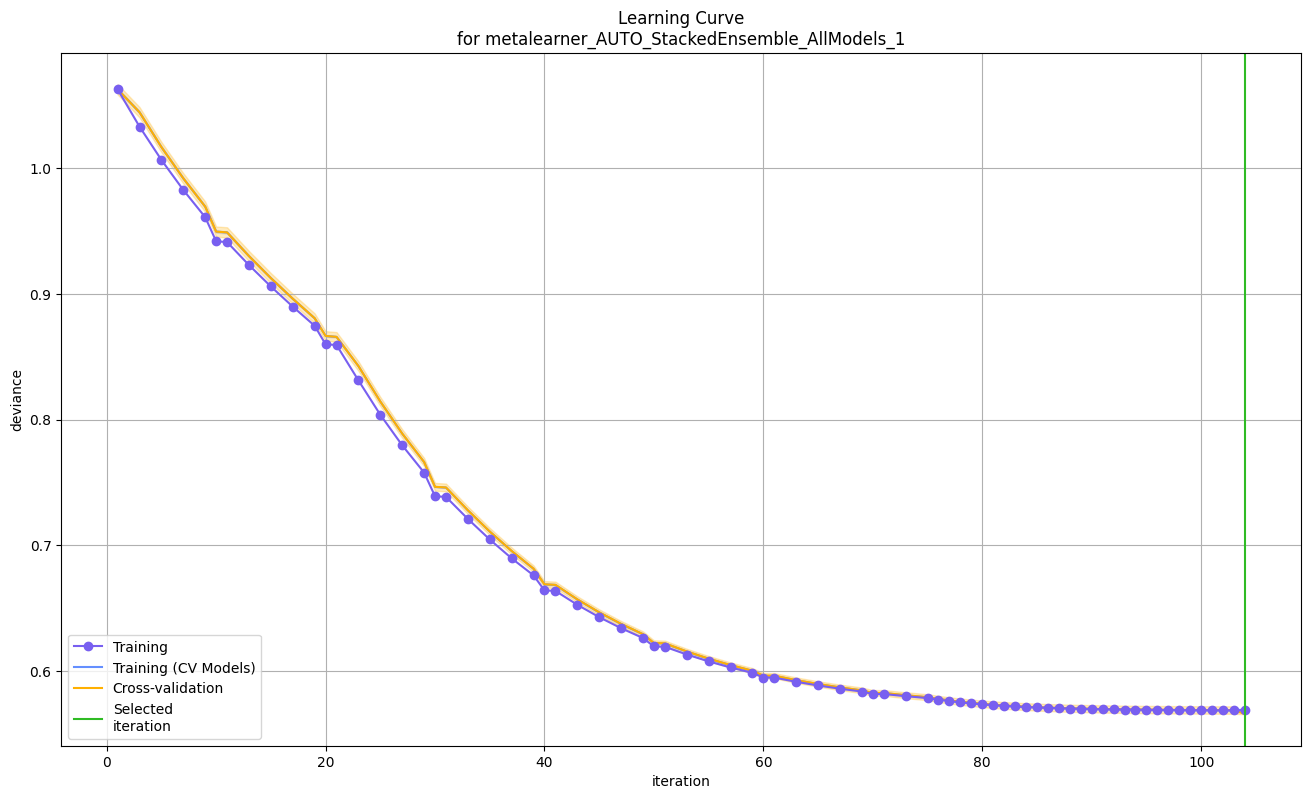

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

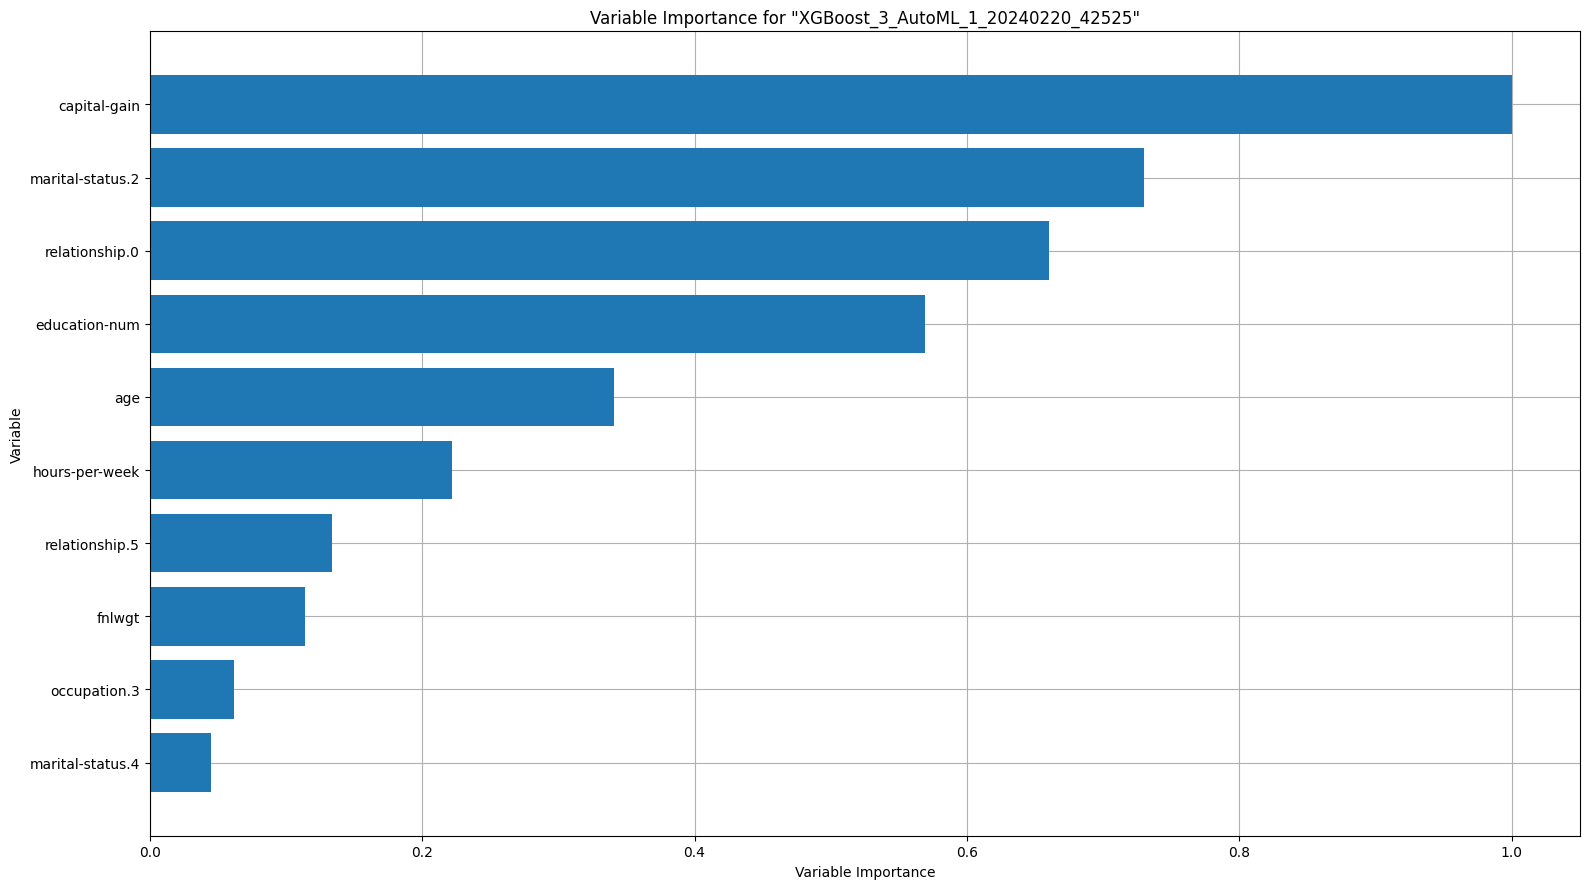

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

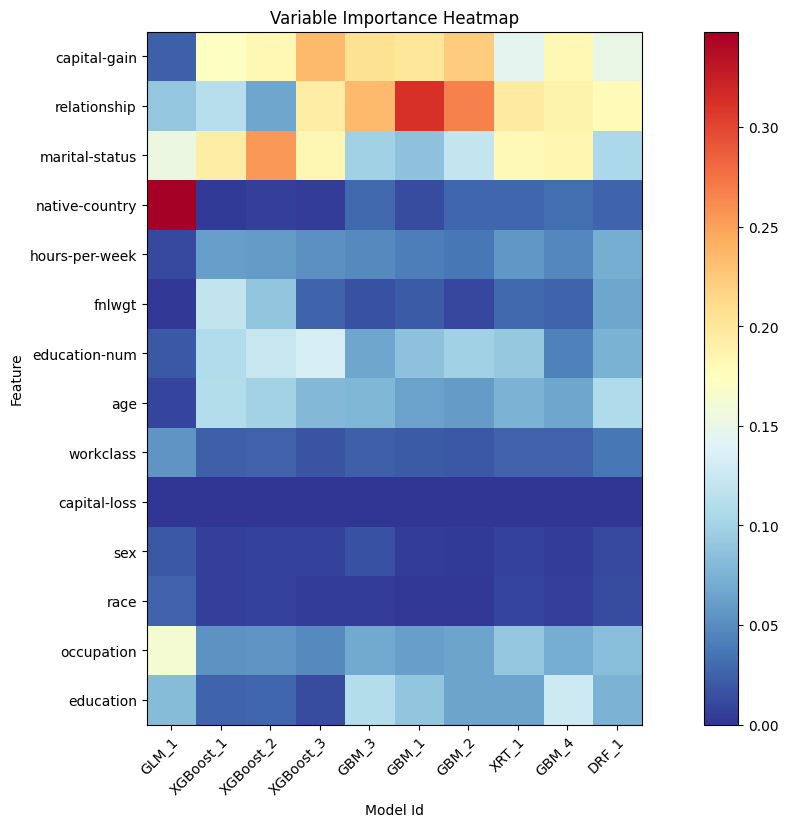

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

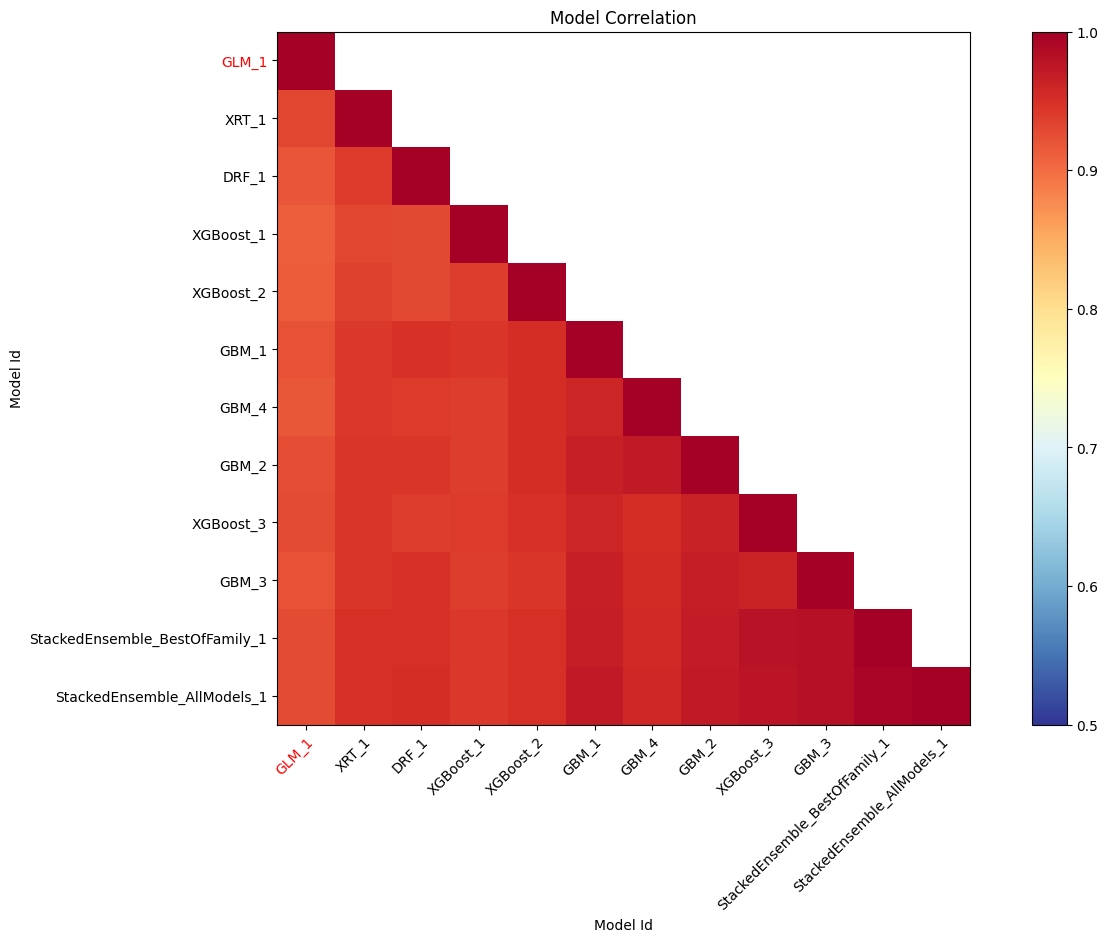

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

/usr/local/lib/python3.10/dist-packages/h2o/explanation/_explain.py:611: RuntimeWarning: invalid value encountered in divide
  res = (res - np.nanmin(res)) / (np.nanmax(res) - np.nanmin(res))


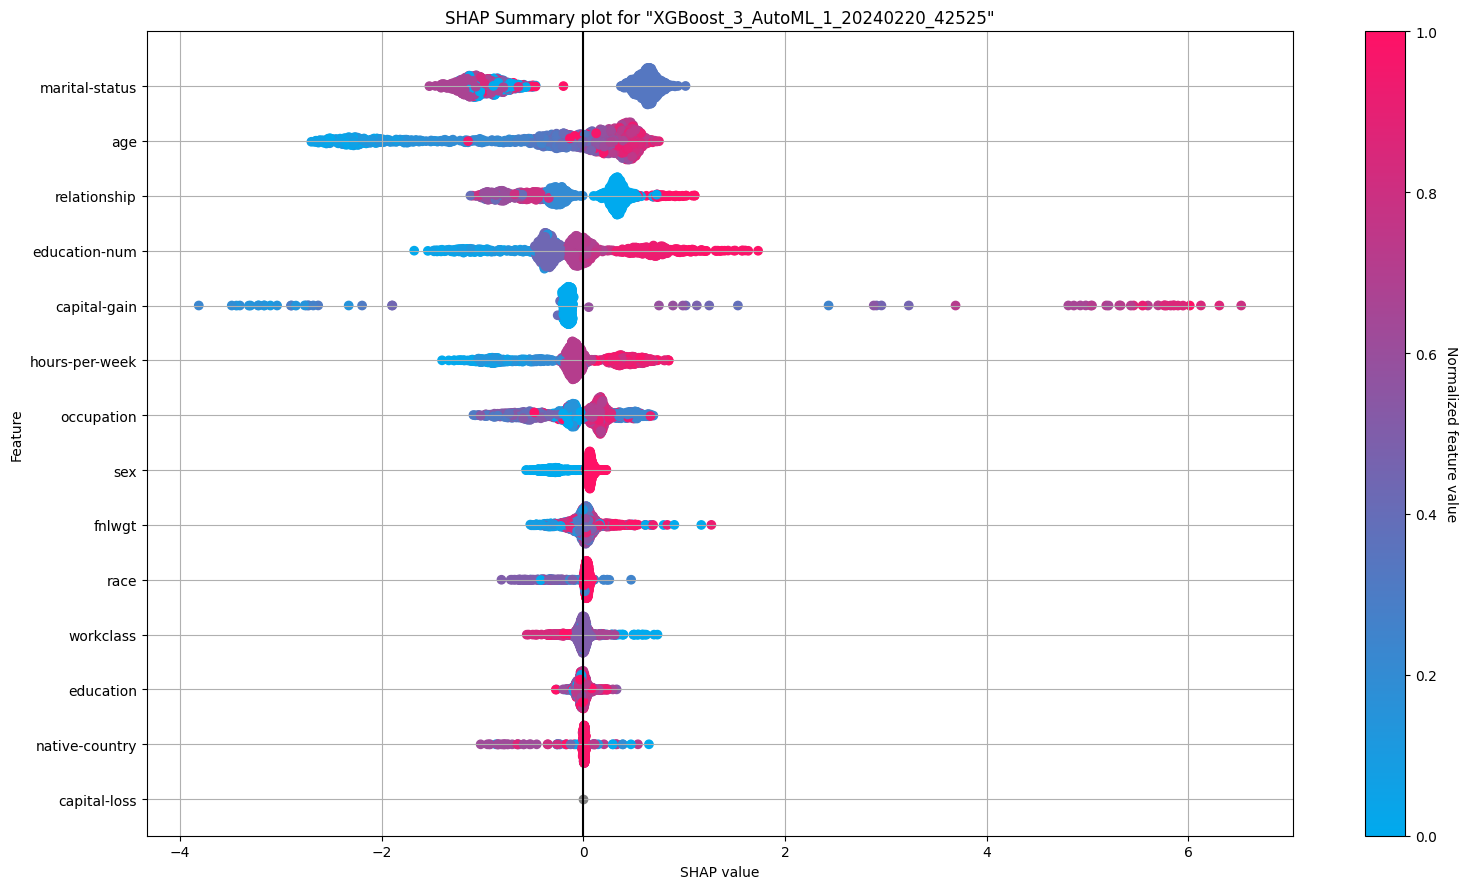

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

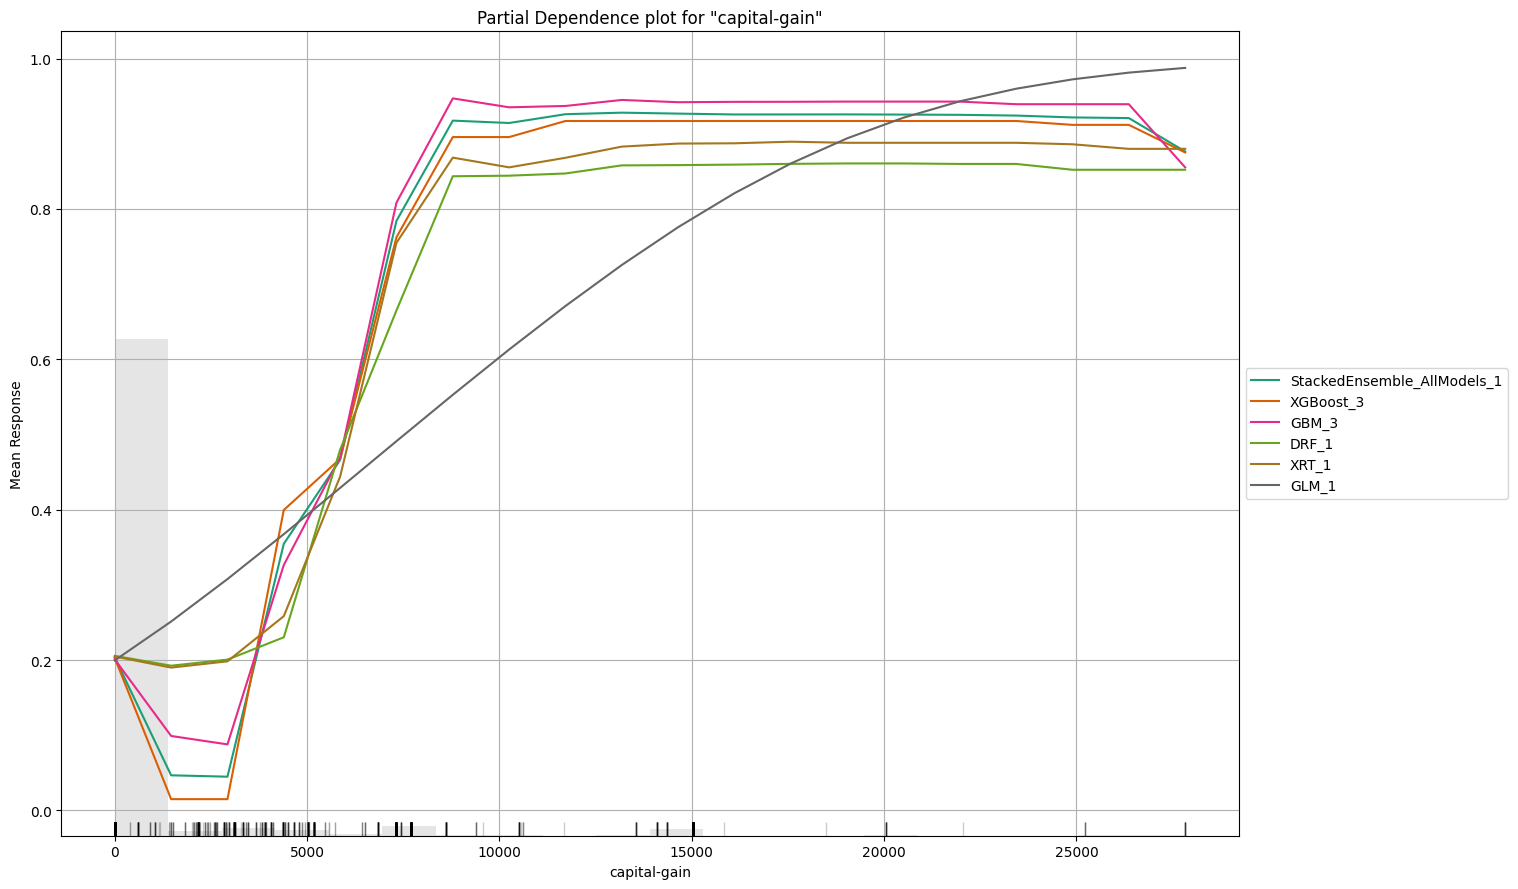

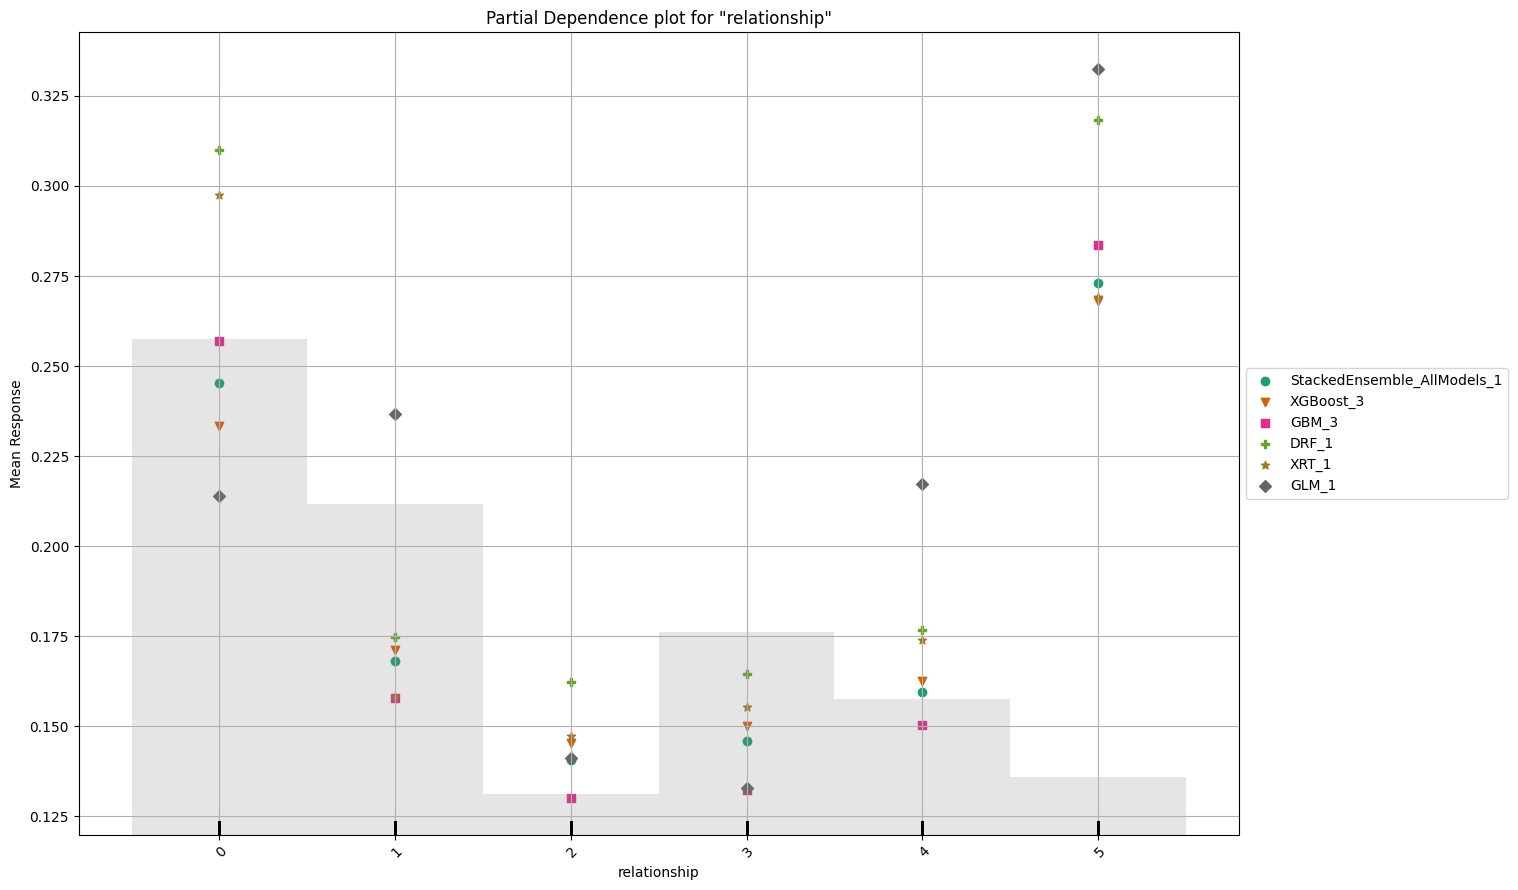

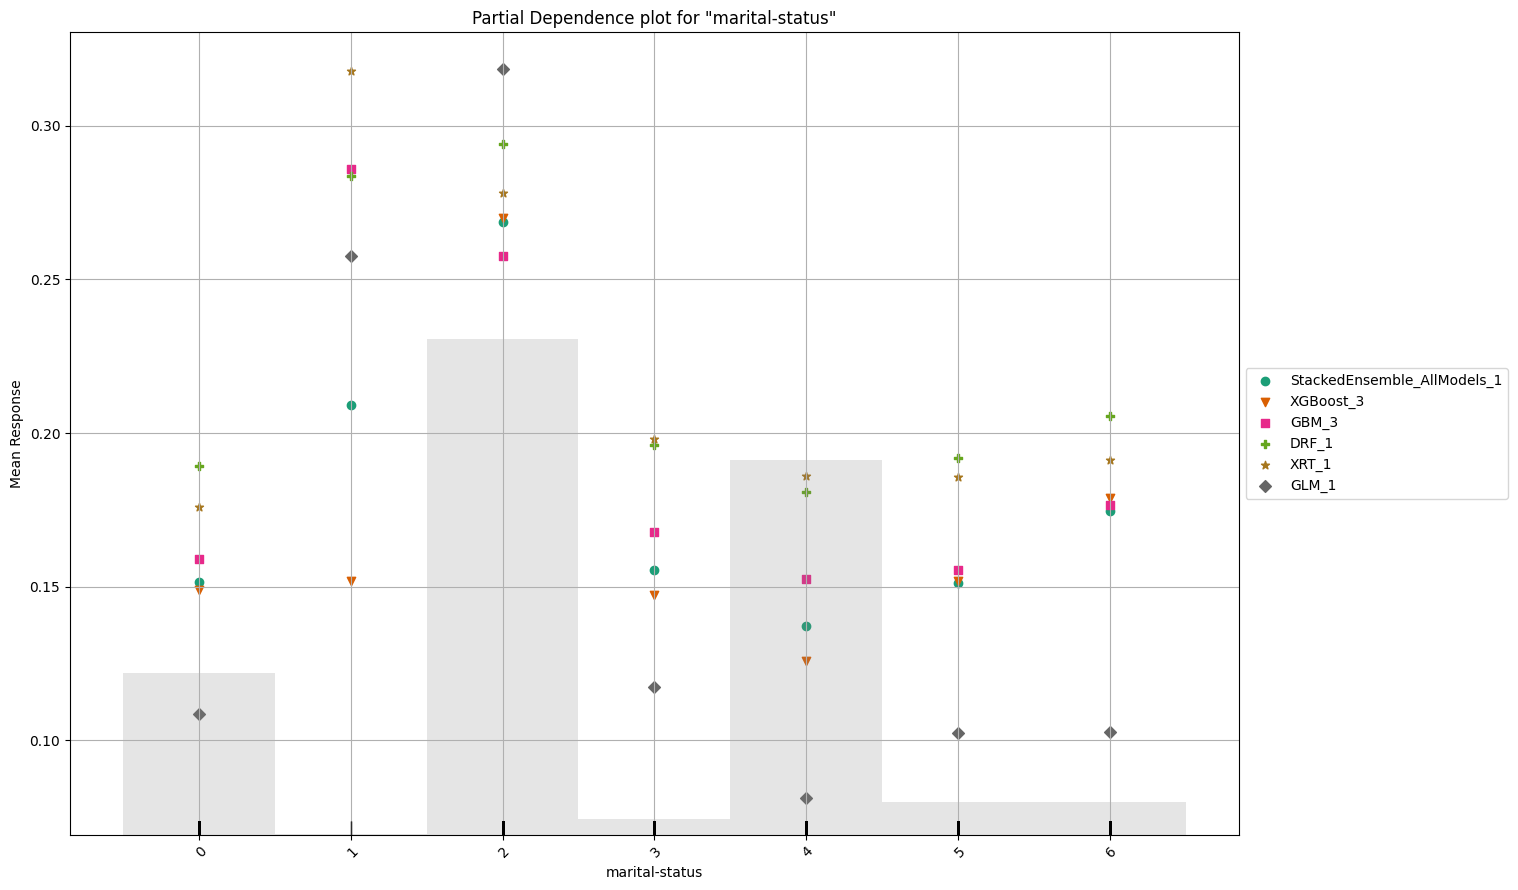

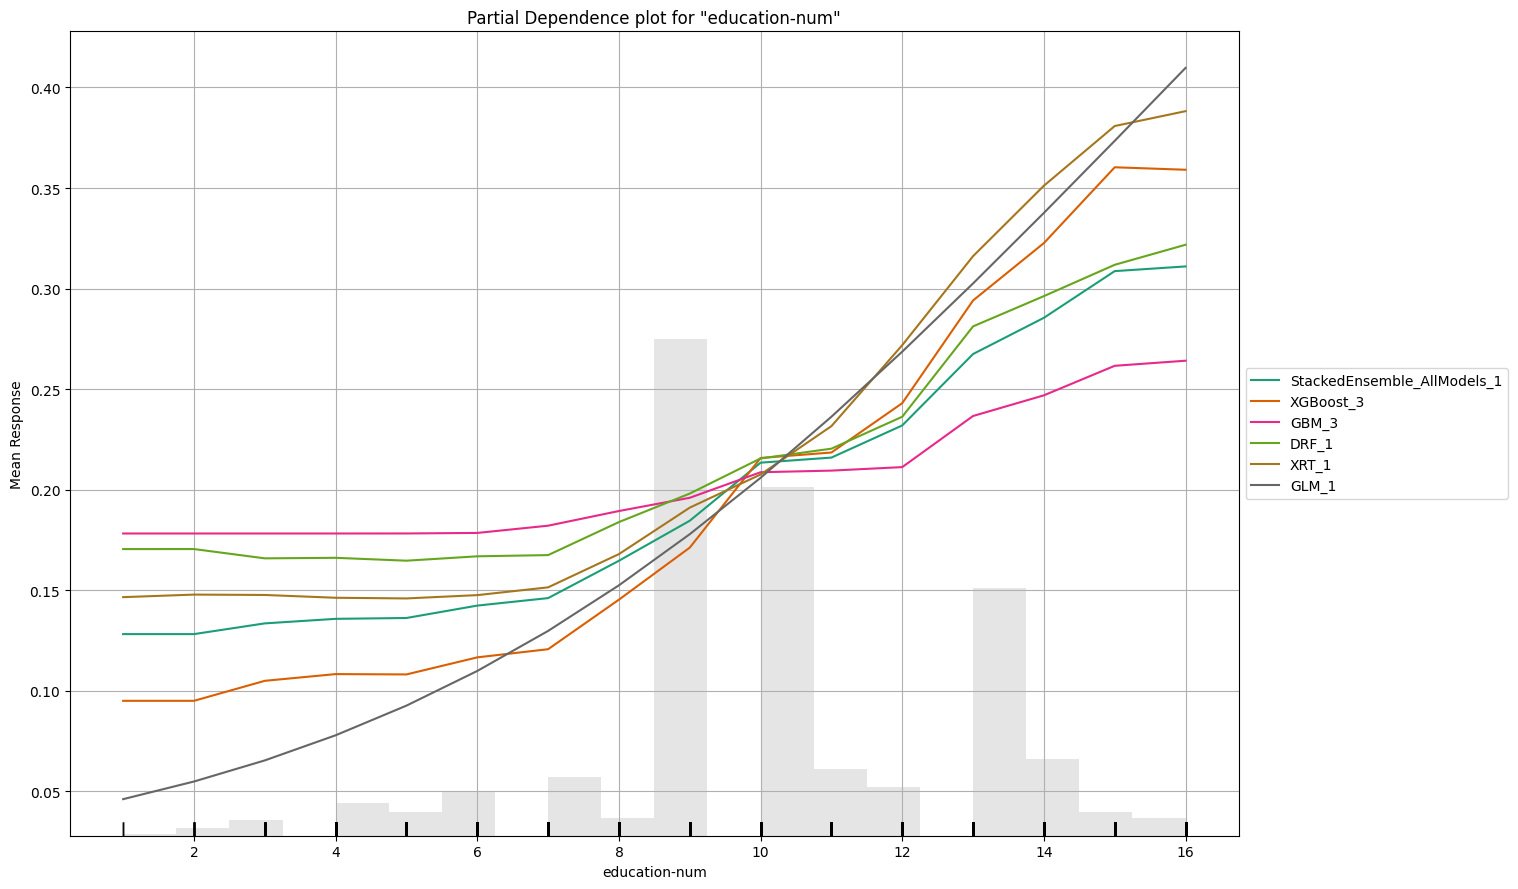

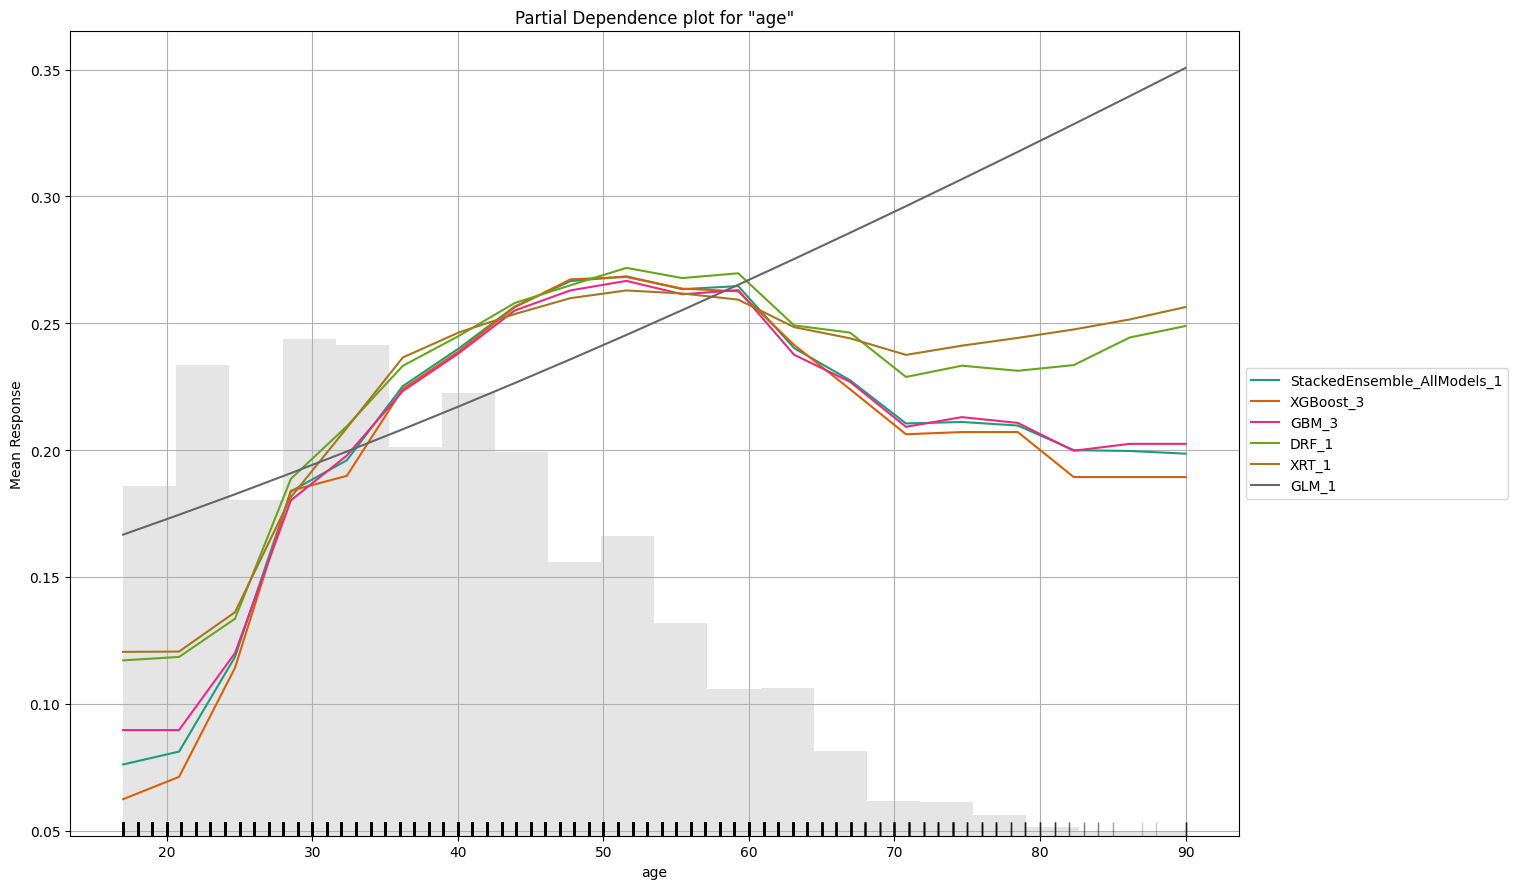

In [60]:
exa = automl.explain(df_test)

#Answer the following questions for all of the models:
* Is the relationship significant?

> Yes, because p value is 0, so the relationship is very much significant


* Are any model assumptions violated?


> no, this is a binary classification. It works fine with automl.



* Is there any multicollinearity in the model?



> Yes, There were some multicollinearity in the model on Native Country, Education-num, race, hours-per-week columns of VIF greater than 15.




* In the multivariate models are predictor variables independent of all the other predictor variables?


> No, they are dependent to each other. Mainly, native-country has the largest VIF of 28

* In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.


> Capital-gain and relationship are the most significant predicator in the model.


* Does the model make sense?


> Yes, this is a binary classification model which works good with automl.


* Does regularization help?


> No, The AUC of Ridge regression is 10% lesser than the best model of AutoML.



* Which independent variables are significant?


> Capital-gain and relationship are the most significant predicator in the model.



* Which hyperparameters are important?


> There are some, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.




# **Conclusion**

The Stacked Ensemble model gave performance in binary classification, with a high AUC of 0.942. Low MSE and RMSE values proves that accurate predictions.

# **References**


1.   https://docs.h2o.ai/h2o/latest-stable/h2o-docs/

2.   https://towardsdatascience.com/a-deep-dive-into-h2os-automl-4b1fe51d3f3e

3.  My previous assignment


MIT License

Copyright (c) 2024 Ramshankar-Bhuvaneswaran

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.